In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

In [21]:
df = pd.read_csv('Student_Performance.csv')

In [22]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [23]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [24]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [25]:
df.dtypes

Hours Studied                        int64
Previous Scores                      int64
Extracurricular Activities          object
Sleep Hours                          int64
Sample Question Papers Practiced     int64
Performance Index                    int64
dtype: object

In [26]:
#convert no numberical columns to numerical 
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [27]:
label_encoder = LabelEncoder()
label_encoder.fit_transform(df['Extracurricular Activities'])

array([1, 0, 1, ..., 1, 1, 0], shape=(10000,))

In [28]:
label_encoder.transform(df['Extracurricular Activities'])

array([1, 0, 1, ..., 1, 1, 0], shape=(10000,))

In [29]:
df["Extracurricular Activities"] = label_encoder.fit_transform(df['Extracurricular Activities'])

In [30]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [31]:
x = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced']]
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [32]:
y = df["Performance Index"]
y

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int64

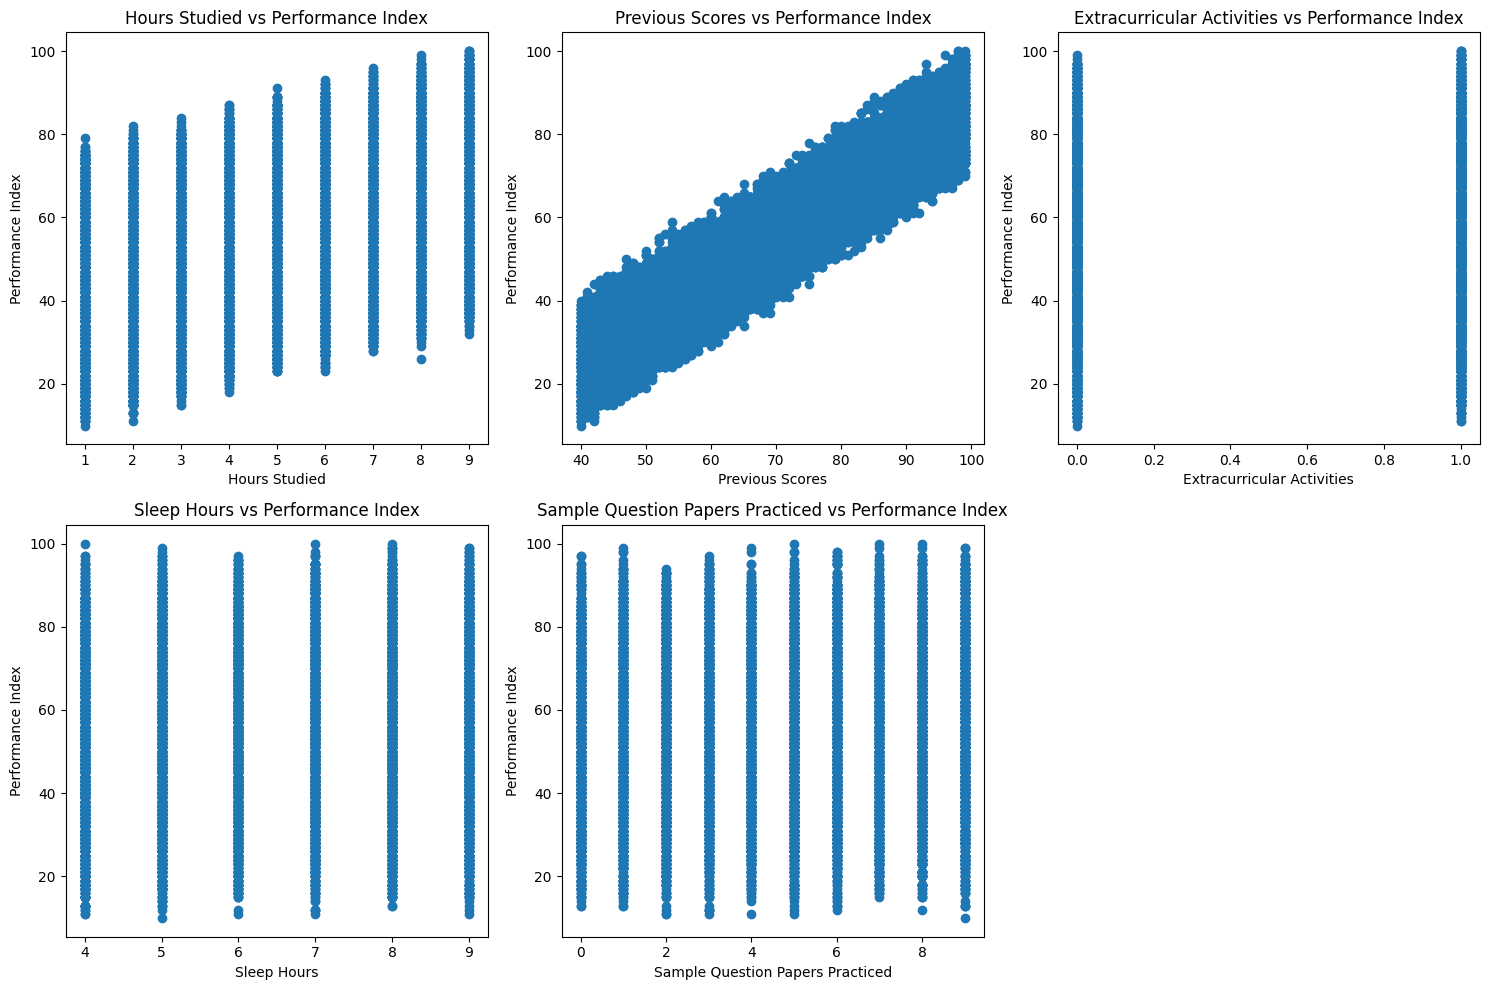

In [54]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced']
target = 'Performance Index'

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

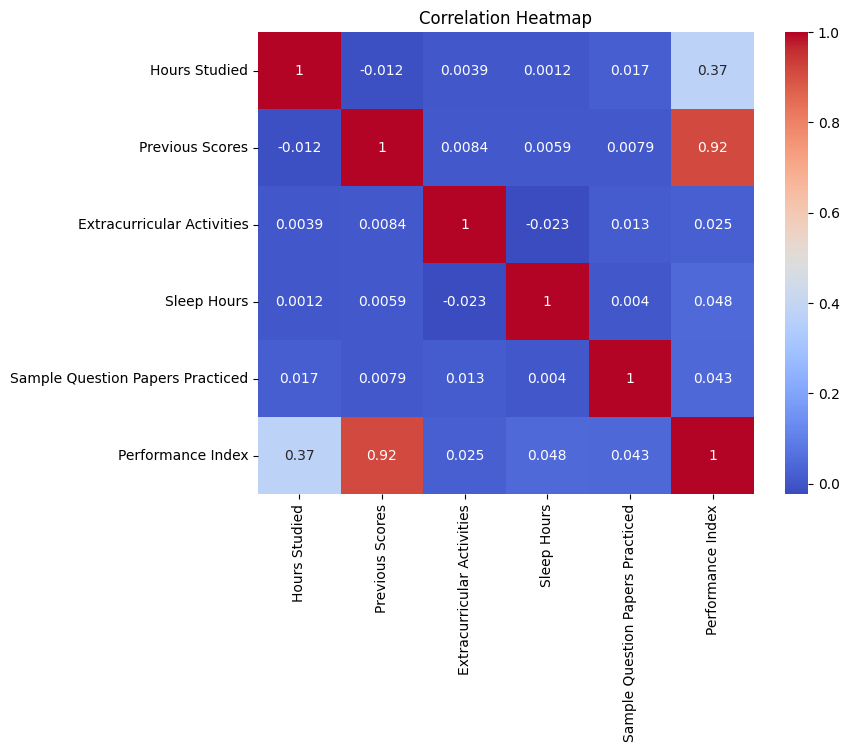

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
train_y

9254    36
1561    25
1670    59
6087    22
6669    40
        ..
5734    48
5191    51
5390    44
860     20
7270    24
Name: Performance Index, Length: 8000, dtype: int64

<Axes: ylabel='Count'>

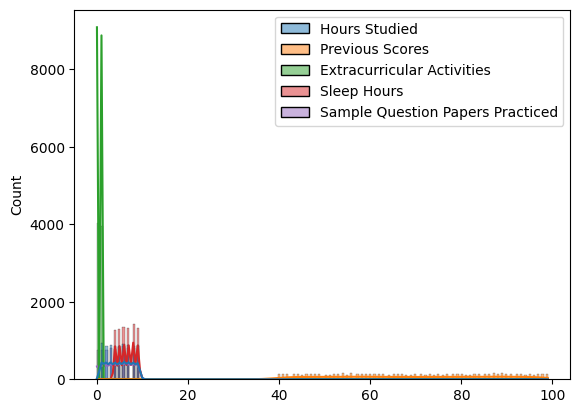

In [36]:
# graph before scaling
sns.histplot(data=train_x, kde=True)

In [37]:
scalar = StandardScaler()
train_x_scaled = scalar.fit_transform(train_x)
test_x_scaled = scalar.fit_transform(test_x)
test_x_scaled = scalar.transform(test_x)


<Axes: ylabel='Count'>

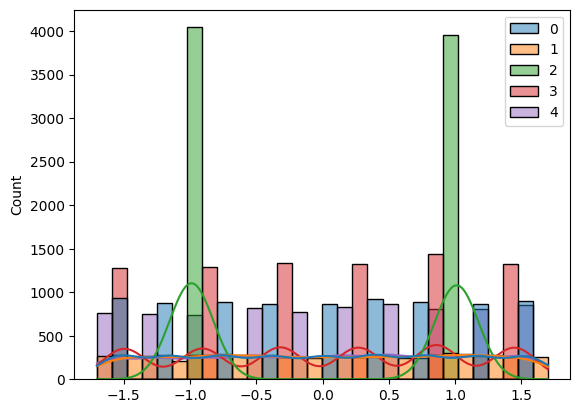

In [39]:
sns.histplot(data=train_x_scaled, kde=True)

In [40]:
linear_model = LinearRegression()
linear_model.fit(train_x_scaled,train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
y_pred = linear_model.predict(test_x_scaled)

In [42]:
test_x_scaled

array([[-0.01227298, -0.0060277 , -0.99104014,  0.89844227, -0.84856166],
       [-1.1811281 , -1.33269881,  1.00904087, -1.4760335 ,  1.22912451],
       [ 0.76696377, -0.75588528,  1.00904087,  0.30482333,  0.19028142],
       ...,
       [-1.1811281 , -1.67878692,  1.00904087,  0.30482333, -0.84856166],
       [-0.79150973,  0.80151123, -0.99104014,  0.30482333,  0.19028142],
       [-0.01227298, -0.52515987, -0.99104014,  0.89844227, -0.1559996 ]],
      shape=(2000, 5))

In [43]:
linear_model.predict([[-0.01227298, -0.0060277 , -0.99104014,  0.89844227, -0.84856166]])

array([55.07482708])

In [49]:
print("MSE : ",mean_squared_error(test_y,y_pred))
print("R2 : ",r2_score(test_y,y_pred))
print("MAE : ",mean_absolute_error(test_y,y_pred))

MSE :  4.267922744275173
R2 :  0.9884832861331776
MAE :  1.6512846285053149


In [45]:
#Store the created model using pickle as physical file
with open('student_performance_linera_regression_model.pkl', 'wb') as f:
    pickle.dump((linear_model,scalar,label_encoder), f)

In [46]:
linear_model.score(train_x_scaled,train_y)

0.9886898790682355

In [47]:
print(f"Intercep(B0): {linear_model.intercept_:.1f}")
print(f"Coeffiecents: B1 {linear_model.coef_[0]:.1f} B2 {linear_model.coef_[1]:.1f} B3 {linear_model.coef_[2]:.1f} B4 {linear_model.coef_[3]:.1f} B5 {linear_model.coef_[4]:.1f} ")

Intercep(B0): 55.3
Coeffiecents: B1 7.4 B2 17.6 B3 0.3 B4 0.8 B5 0.5 


In [48]:
print(f"y =  {linear_model.intercept_:.1f} + {linear_model.coef_[0]:.1f}X1 + {linear_model.coef_[1]:.1f}X2 + {linear_model.coef_[2]:.1f}X3 + {linear_model.coef_[3]:.1f}X4 + {linear_model.coef_[4]:.1f}X5")

y =  55.3 + 7.4X1 + 17.6X2 + 0.3X3 + 0.8X4 + 0.5X5


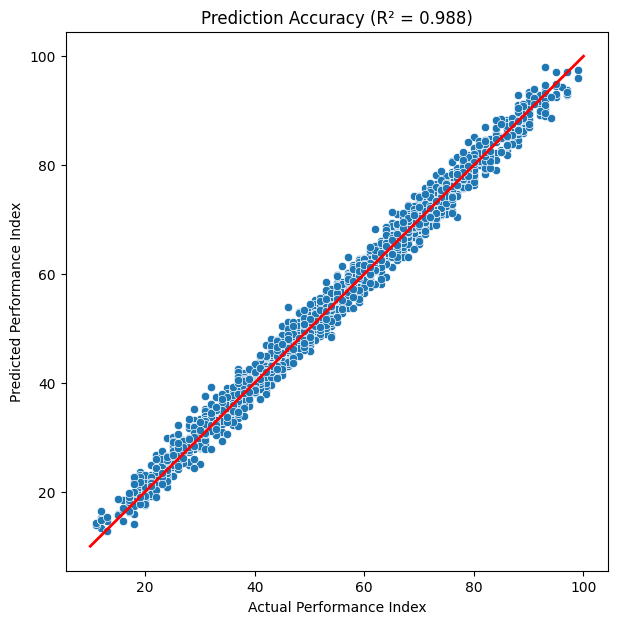

In [63]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=test_y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Ideal line y = x
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title(f"Prediction Accuracy (R² = {r2_score(test_y, y_pred):.3f})")
plt.show()

In [64]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [65]:
hours_studied = input("Enter hours studied: ")
previous_scores = input("Enter previous scores: ")
extracurricular_activities = input("Enter extracurricular activities (yes/no): ")
sleep_hours = input("Enter sleep hours: ")
sample_question_papers_practiced = input("Enter sample question papers practiced: ")
extracurricular_activities_encoded = label_encoder.transform([extracurricular_activities])[0]
input_data = np.array([[float(hours_studied), float(previous_scores), extracurricular_activities_encoded, float(sleep_hours), float(sample_question_papers_practiced)]])
input_data_scaled = scalar.transform(input_data)
predicted_performance_index = linear_model.predict(input_data_scaled)
print(f"Predicted Performance Index: {predicted_performance_index[0]:.2f}")

Predicted Performance Index: 92.26


c:\Users\Admin\.conda\envs\agenticAI311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
x_new = df[['Previous Scores']]
y_new = df['Performance Index']
x_new_scaled = scalar.fit_transform(x_new)
train_new_x, test_new_x, train_new_y, test_new_y = train_test_split(x_new_scaled, y_new, test_size=0.2, random_state=42)

In [70]:
linear_model_new = LinearRegression()
linear_model_new.fit(train_new_x,train_new_y)
test_y_pred = linear_model_new.predict(test_new_x)
print("MSE : ",mean_squared_error(test_new_y,test_y_pred))
print("R2 : ",r2_score(test_new_y,test_y_pred))
print("MAE : ",mean_absolute_error(test_new_y,test_y_pred))

MSE :  58.949059849219644
R2 :  0.8409297694265205
MAE :  6.557486173405253
